In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>

# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임
 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
 * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택

## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [10]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
pca = PCA(n_components=2) #n_components=2:주성분의 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [24]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_
# 주성분1 = 0.36138659*x1 -0.08452251*x2 + 0.85667061*x3 + 0.3582892 *x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지(설명하는지)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [26]:
# 설명분산을 0~1사이의 비율로 조정된 설명정도 : 주성분 결과 특성은 97.76852%
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1-3 상관관계 확인
- 각변수들끼리의 상관관계 확인(시각화), 종속변수와 상관관계가 높은 변수들만 선택

In [29]:
import pandas as pd
#redwine = pd.read_csv('data/winequality-red.csv', delimiter=';')
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
651,9.8,0.88,0.25,2.5,0.104,35.0,155.0,1.001,3.41,0.67,11.2,5


In [32]:
corr = redwine.corr()
# 상관관계 결과를 시각화(heatmap)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# cmap의 종류 : https://jrc-park.tistory.com/155 
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap 
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

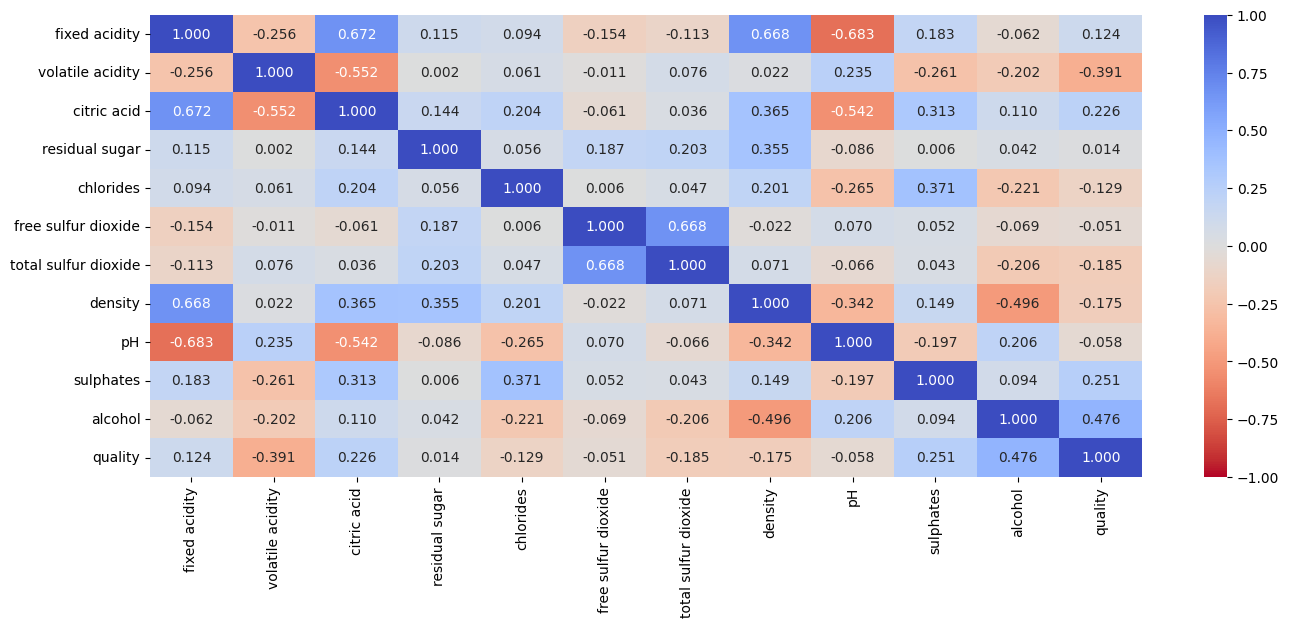

In [41]:
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

In [52]:
np.triu(np.ones_like(corr), k=0) # 대각선 포함 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k=1) # 대각선 제외 위가 1인 삼각행렬
np.tril(np.ones_like(corr), k=0) # 대각선 포함 아래가 1인 삼각행렬
np.tril(np.ones_like(corr), k=-1) # 대각선 제외 아래가 1인 삼각행렬

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

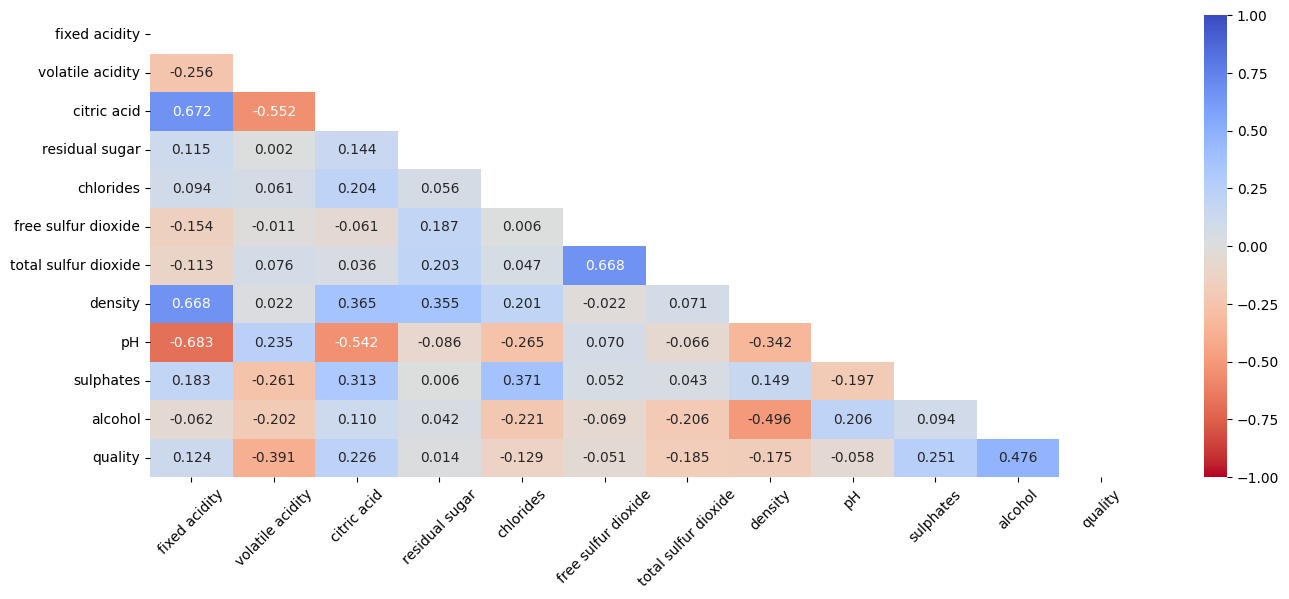

In [54]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r',
           mask=mask)
plt.xticks(rotation=45)
plt.show()

## 1-4 분류모형의 Feature importance
- 분류모형의 feature_importance_  속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussianNB등은 feature_importance_가 없음
- 그 외 분류모형은 사용가능

In [64]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, # 트리 갯수 10개
                                  random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [66]:
rf_model.feature_importances_

array([0.06832024, 0.09367656, 0.06628418, 0.07625247, 0.08285302,
       0.06759203, 0.10744184, 0.07860308, 0.07978042, 0.10863695,
       0.17055921])

In [67]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                        columns=['feature', 'importance']
                       )
features['importance'].sum()

1.0

In [74]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features.head()

,feature,importance
0,alcohol,0.170559
1,sulphates,0.108637
2,total sulfur dioxide,0.107442
3,volatile acidity,0.093677
4,chlorides,0.082853


### feature_importance_를 이용한 변수 중요도 시각화

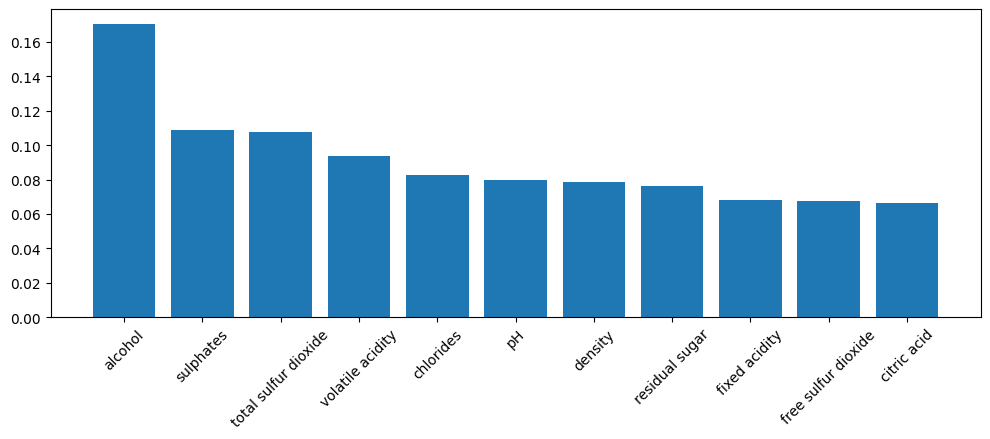

In [77]:
plt.figure(figsize=(12,4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [81]:
# features.importance 누적합
# l = [1, 2, 3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.1705592089113604, 0.1705592089113604],
       [0.10863695235366336, 0.2791961612650238],
       [0.10744183965892265, 0.3866380009239464],
       [0.09367655603222015, 0.48031455695616654],
       [0.08285301696659658, 0.5631675739227631],
       [0.07978042064999286, 0.6429479945727559],
       [0.07860307725057275, 0.7215510718233287],
       [0.07625247352472452, 0.7978035453480532],
       [0.06832024143987096, 0.8661237867879241],
       [0.0675920345395004, 0.9337158213274245],
       [0.06628417867257541, 0.9999999999999999]], dtype=object)

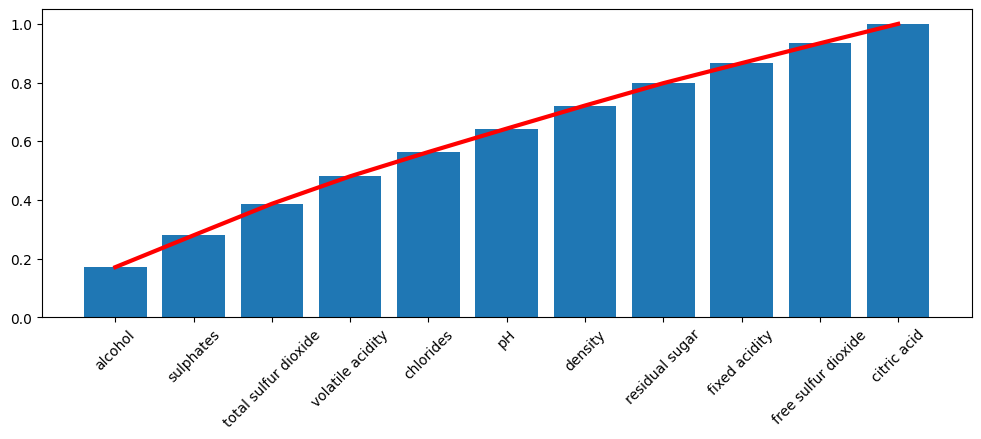

In [85]:
# 누적합을 이용하여 시각화
plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red', lw=3)
plt.xticks(rotation=45, fontsize=10)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 가면서 최종 선택된 변수 개수만큼 중요도가 높은 변수를 찾는다.

In [91]:
# 5개 특징이 남을 때까지 변수를 제거(기준:feature_importances_)
from sklearn.feature_selection import RFE
rfe = RFE(rf_model,
         n_features_to_select=5)
rfe.fit(train_X, train_y)
rfe.get_support()

array([False,  True, False, False,  True, False,  True, False, False,
        True,  True])

In [96]:
features_rfe = pd.DataFrame(np.c_[X.columns, rfe.get_support()],
                            columns=['feature', 'selected'])
features_rfe[features_rfe.selected==True]

,feature,selected
1,volatile acidity,True
4,chlorides,True
6,total sulfur dioxide,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 feature 선택

In [99]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [103]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [105]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형. x는 연속형
# chi2 :  y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...
X_new = SelectKBest(f_classif, # x가 연속형
                   k=1 # 추출될 feature 갯수
                   ).fit_transform(X, y)
X_new[:3] # petal_length

array([[1.4],
       [1.4],
       [1.3]])

In [106]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 파라미터 선택
- 하이퍼파라미터(사용자가 직접 설정할 수 있는 파라미터). 최적의 결과를 내는 하이퍼파라미터값?
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클래스(가장 높은 socre를 내는 모형까지 찾아줌)

## 2-1 validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [2]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data : (1797, 64) 배열 (독립변수)
# digits.images : (1797, 8, 8) 배열
# digits.target : 1797 열 배열 (타겟변수)
# digits.target_names : 타겟변수 내용
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [119]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [121]:
np.all(X[0].reshape(8,8) == digits.images[0])

True

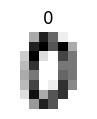

In [129]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.title(y[0])
plt.axis('off')
plt.show()

In [4]:
from sklearn.svm import SVC
model = SVC(probability=True) # probability=True:판별모형이라도 proba가능
model.fit(X, y)

SVC(probability=True)

In [5]:
# 예측값
model.predict(X[0].reshape(1, -1))

array([0])

In [6]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1,-1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91385036e-01 2.10497275e-04 4.53628313e-04 9.10388853e-04
  5.71549971e-04 1.37528638e-03 7.04847511e-04 8.96220120e-04
  7.21080511e-04 2.77146485e-03]]


In [7]:
for c, p in zip(model.classes_,
               model.predict_proba(X[0].reshape(1,-1))[0] ):
    print("{}일 확률 : {:.3f}".format(c,p))

0일 확률 : 0.991
1일 확률 : 0.000
2일 확률 : 0.000
3일 확률 : 0.001
4일 확률 : 0.001
5일 확률 : 0.001
6일 확률 : 0.001
7일 확률 : 0.001
8일 확률 : 0.001
9일 확률 : 0.003


In [8]:
model.score(X, y)

0.996661101836394

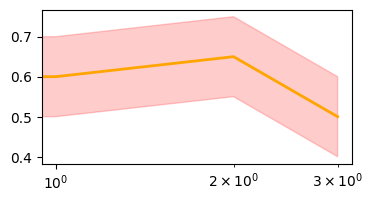

In [13]:
import matplotlib.pyplot as plt
import numpy as np
range = np.array([0, 1, 2, 3])
score = np.array([0.5, 0.6, 0.65, 0.5])
plt.figure(figsize=(4,2))
plt.semilogx(range, score, color='orange', lw=2)
plt.fill_between(range, score-0.1, score+0.1, color='red', alpha=0.2)
plt.show()

In [16]:
# SVC() 모형에서 C 파라미터 값을 다음의 범위 중 제일 좋은 C값?
# 10의 -6승부터 10의 -1승까지 로그간격으로 균등분포 10개를 추출
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [17]:
%%time
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(
    SVC(), # 예측모형
    X, y,
    param_name="gamma",
    param_range=param_range, # list로 파라미터 전달
    cv=10, # 교차검증 : 데이터 10개중 1개씩 test 데이터로 검증하고 평균 score
    scoring="accuracy",
    n_jobs=-1 # 시스템의 모든 core 사용
)

CPU times: total: 188 ms
Wall time: 11.6 s


In [20]:
test_score.shape, train_score.shape

((10, 10), (10, 10))

In [25]:
train_score_mean = np.mean(train_score, axis=1) # 행별 평균
test_score_mean = np.mean(test_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)

In [22]:
train_score_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [24]:
test_score_mean

array([0.13871508, 0.70395717, 0.90871198, 0.94264742, 0.95880509,
       0.97495655, 0.97496586, 0.80522036, 0.19709497, 0.10463687])

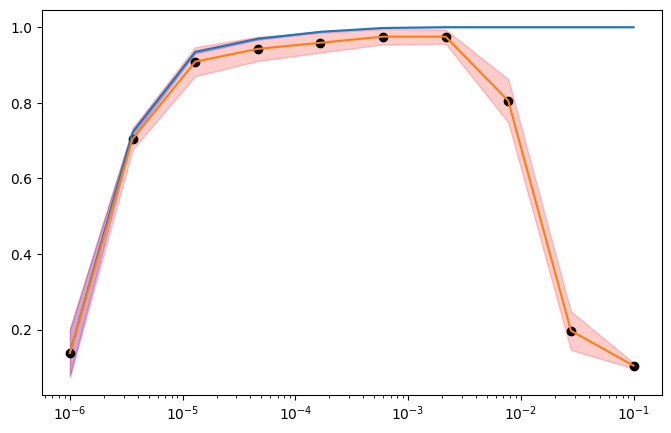

In [30]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range, train_score_mean)
plt.fill_between(param_range, train_score_mean-train_score_std,
                train_score_mean+train_score_std,
                alpha=0.2,
                color='blue')
plt.semilogx(param_range, test_score_mean)
plt.fill_between(param_range, test_score_mean-test_score_std,
                test_score_mean+test_score_std,
                alpha=0.2,
                color='red')
plt.scatter(param_range, test_score_mean, c='k')

In [31]:
test_score_mean.argmax()

6

In [35]:
# 최적의 gammar값
gamma = param_range[6]
gamma

0.0021544346900318843

In [36]:
model = SVC(gamma=gamma).fit(X, y)

In [37]:
model.score(X, y)

1.0

## 2-2 GridSearchCV
- 복수개의 하이퍼 파라미터 최적화 클래스
- 모형도 가지고 옴
- fit(), score(), predict(), predict_proba(), decision_funcion()

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

# 데이터
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [42]:
%%time
# SelectKBest로 최적의 독립변수 k개 찾음 -> SVC()에서 최적의 C값을 찾음
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개 찾음
svc = SVC(kernel='linear') # 직선으로 나누는 가장 단순한 분류모형
pipeline = Pipeline([('select', selection), ('svc', svc)])
param_grid = dict(select__k = [4,5,6,7,8,9,10,11],
        svc__C = [0.1, 1, 10] # 오차 범위 허용 정도(큰C:엄격, 작은C:허용범위 큼)
)
grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid, # 파라미터들
                cv=2,
                verbose=2, # 로그 출력의 수다스러운 정도
                n_jobs=-1
)
grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 14.9 s
Wall time: 2min 5s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [43]:
# 최적의 파라미터값
grid_search.best_params_

{'select__k': 9, 'svc__C': 1}

In [45]:
# 최적의 모형
model = grid_search.best_estimator_
model.score(redwine_X.values, redwine_y.values)

0.5878674171357098

In [46]:
model = SVC().fit(redwine_X.values, redwine_y.values)
model.score(redwine_X.values, redwine_y.values)

0.5103189493433395

# 3절. 자료 불균형 처리
- 단순 언더/오버 샘플링
- 단, 단순 오버샘플링시 소수의 데이터를 복사하면, 과적합 우려
- 오버샘플링하는 방법 : SMOTE
## 3-1 SMOTE를 이용한 오버샘플링 전

In [50]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                          n_features=10, # 독립변수 갯수
                          n_informative=5, # 타겟변수에 영향을 미치는 독립변수
                          n_redundant=0,
                          n_clusters_per_class=1,
                          n_classes=2,
                          weights=[0.99, 0.01], # 각 클래스에 할당된 표본 
                          random_state=42)
y.mean()

0.014

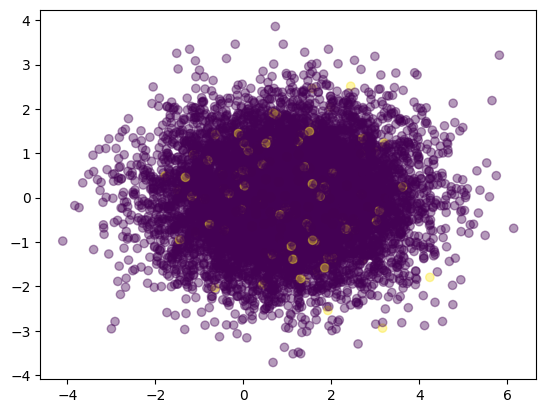

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [55]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [57]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2 SMOTE를 이용한 전체 오버샘플링 후 데이터 셋 분리
- imbalanced-learn 라이브러리 install

In [67]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X, y])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     140
Name: 10, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
#sm = SMOTE() # 0그룹 : 1그룹 = 1:1
sm = SMOTE(sampling_strategy={0:9860, 1:420})
X_resampled, y_resample = sm.fit_resample(X, y)
X_resampled.shape, y_resample.shape

((10280, 10), (10280,))

In [69]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X_resampled, y_resample])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     420
Name: 10, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resample,
                                                   test_size=0.3,
                                                   stratify=y_resample,
                                                   random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  54,   72]], dtype=int64)

In [74]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2958
           1       1.00      0.57      0.73       126

    accuracy                           0.98      3084
   macro avg       0.99      0.79      0.86      3084
weighted avg       0.98      0.98      0.98      3084



## 3-3 가중치 제어
- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형에서 class_weigh 매개변수 설정

In [75]:
rf_model = RandomForestClassifier(n_estimators=100,
                     max_features=2, 
                     class_weight={0:1, 1:1.4}, # 1그룹을 1.4배 더 중요하게
                     random_state=42
                     )
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

# 4절. 앙상블 모형
- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성을 달성
- 방법 :
    * 하나의 메타 분류 알고리즘 이용 : 배깅(bagging), 부스팅(boosting)
    * 여러 분류 알고리즘을 이용 : 다수결투표
- 배깅 vs 부스팅
    * 배깅
        - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
        - 과적합 줄일 수 있음
        - 데이터가 충분하고 과적합을 방지하면서 안정적인 모델이 필요할 때
        - RandomForestClassifier, BagginClassifier
    * 부스팅
        - 순차적으로 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
        - 오답에 가중치를 둠(오답에 더 집중)
        - 성능 극대화
        - 성능 극대화해야 하는데, 데이터가 비교적 적거나 복잡한 패턴의 학습을 해야할 경우

## 4-1 배깅알고리즘

In [77]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
X = wine_df.iloc[:, 1:]
y = wine_df['Class label']
X.shape, y.shape

((178, 13), (178,))

In [79]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [80]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [81]:
# 의사결정나무 알고리즘
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.9074074074074074

In [82]:
# 배깅알고리즘
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(estimator=tree_model,
                 n_estimators=500,
                 bootstrap=True, #  복원추출을 허용
                 bootstrap_features=False, # 모든 feature 사용해서 학습
                 random_state=1)
bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.9629629629629629

In [84]:
# 랜던포레스트알고리즘
rf_model = RandomForestClassifier().fit(train_X, train_y)
rf_model.score(test_X, test_y)

1.0

### 배깅알고리즘시 0.632규칙

In [97]:
np.random.choice(10, 10, replace=True) # 10개 데이터를 10개 복원추출 뽑기

array([6, 9, 9, 7, 8, 3, 3, 5, 2, 5])

In [163]:
len(set(np.random.choice(10000, 10000, replace=True) ))

6297

In [201]:
N = 10000000
len(set(np.random.choice(N, N))) / N

0.6321982

## 4-2 임의의 데이터를 만들어 최적 모형 탐색

In [215]:
X, y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.9, 0.1], # 0그룹인 90%, 1그룹10%
                          random_state=42)

In [216]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y, 
                                                   random_state=42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape, test_X.shape, test_y.shape

((1246, 10), (1246,), (300, 10), (300,))

In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y,
                 test_X=test_X, test_y=test_y):
    '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X) # 모델 예측값
    accuracy = model.score(test_X, test_y)
    precision = precision_score(test_y, y_hat)
    recall    = recall_score(test_y, y_hat)
    f1score   = f1_score(test_y, y_hat)
    return "정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1 :{:.3f}".format(
            accuracy, precision, recall, f1score
    )

In [207]:
model_measure(RandomForestClassifier(n_estimators=100,
                                    max_features=2,
                                    random_state=42))

'정확도:0.980, 정밀도:0.931, 재현율:0.871, f1 :0.900'

In [208]:
model_measure(SVC(random_state=42))

'정확도:0.988, 정밀도:0.957, 재현율:0.929, f1 :0.943'

## 4-3 부스팅 알고리즘
- Adaboost, XGB, LGBM, CatBoost

In [209]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

'정확도:0.961, 정밀도:0.757, 재현율:0.919, f1 :0.830'

In [211]:
# pip install --dray-run xgboost=1.7.3후 설치
from xgboost import XGBClassifier 
model_measure(XGBClassifier(max_depth=10, # tree 최대 깊이
                           n_estimators=100, # 나무 갯수
                           learning_rate=0.01)) #학습율

'정확도:0.973, 정밀도:0.850, 재현율:0.896, f1 :0.872'

In [214]:
from lightgbm import LGBMClassifier # pip install lightgbm
model_measure(LGBMClassifier(force_col_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


'정확도:0.987, 정밀도:0.962, 재현율:0.909, f1 :0.935'

## 4-4 투표를 이용한 앙상블
- voting='hard' : 다수결로 투표
- voting ='soft' : 확률의 합을 계산한 투표

In [217]:
X, y = make_classification(n_samples=200,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y, 
                                                   random_state=42)

In [218]:
tf_model = RandomForestClassifier(max_features=2, random_state=42)
xgb_model = XGBClassifier(max_depth=10,
                         n_estimators=100,
                         learning_rate=0.01, # 0.01~0.2
                         eval_metric="logloss")
lgb_model = LGBMClassifier(n_estimators=100, force_col_wise=True, verbose=-1)
print(model_measure(tf_model))
print(model_measure(xgb_model))
print(model_measure(lgb_model))

정확도:0.980, 정밀도:0.931, 재현율:0.871, f1 :0.900
정확도:0.973, 정밀도:0.850, 재현율:0.896, f1 :0.872
정확도:0.987, 정밀도:0.962, 재현율:0.909, f1 :0.935


In [221]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',rf_model),
                                       ('xgb',xgb_model),
                                       ('lgb',lgb_model)],
                          voting='hard')
model_measure(v_model)

CPU times: total: 9.5 s
Wall time: 5.16 s


'정확도:0.983, 정밀도:0.939, 재현율:0.890, f1 :0.914'

In [222]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',rf_model),
                                       ('xgb',xgb_model),
                                       ('lgb',lgb_model)],
                          voting='soft')
model_measure(v_model)

CPU times: total: 9.39 s
Wall time: 5.13 s


'정확도:0.985, 정밀도:0.946, 재현율:0.903, f1 :0.924'

In [5]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("./data/목적별 국적별 입국_250708124220.csv")

# "소 계" 포함된 행 제거
df_cleaned = df[~df.apply(lambda row: row.astype(str).str.contains("소 계").any(), axis=1)]

# 결과 저장
df_cleaned.to_csv("./data/목적별_국적별_입국_소계제거.csv", index=False, encoding='cp949')


In [6]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("./data/목적별_국적별_입국_소계제거.csv", encoding='cp949')



# 결측치 제거 또는 채우기
# df_cleaned = df_cleaned.dropna()       # ← 결측치 제거
df_cleaned = df_cleaned.fillna(0)        # ← 결측치를 0으로 대체

# 결과 저장
df_cleaned.to_csv("목적별_국적별_입국_소계제거_결측처리.csv", index=False, encoding='cp949')


In [15]:
import pandas as pd

# 파일 경로
file_path = "./data/filtered_입국통계.csv"

# CSV 파일 읽기 (EUC-KR 인코딩)
df = pd.read_csv(file_path, encoding="cp949")

# 첫 번째 행(헤더처럼 쓰인 실제 데이터 행)에서 '성장률', '구성비' 포함된 열 인덱스 찾기
header_row = df.iloc[0]
columns_to_drop = [i for i, val in enumerate(header_row) if '성장률' in str(val) or '구성비' in str(val)]

# 해당 열 제거
df_cleaned = df.drop(df.columns[columns_to_drop], axis=1)

# 첫 번째 행 제거 (실제 데이터 시작)
df_cleaned = df_cleaned.drop(index=0).reset_index(drop=True)

# 결과 저장
df_cleaned.to_csv("./data/정제된_입국통계_인원만.csv", index=False, encoding="cp949")


In [16]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("./data/정제된_입국통계_인원만.csv", encoding="cp949")

# "소 계" 포함된 행 제거
df_filtered = df[~df.apply(lambda row: row.astype(str).str.contains("소 계").any(), axis=1)]

# 결과 저장
df_filtered.to_csv("./data/소계제거_입국통계.csv", index=False, encoding="cp949")


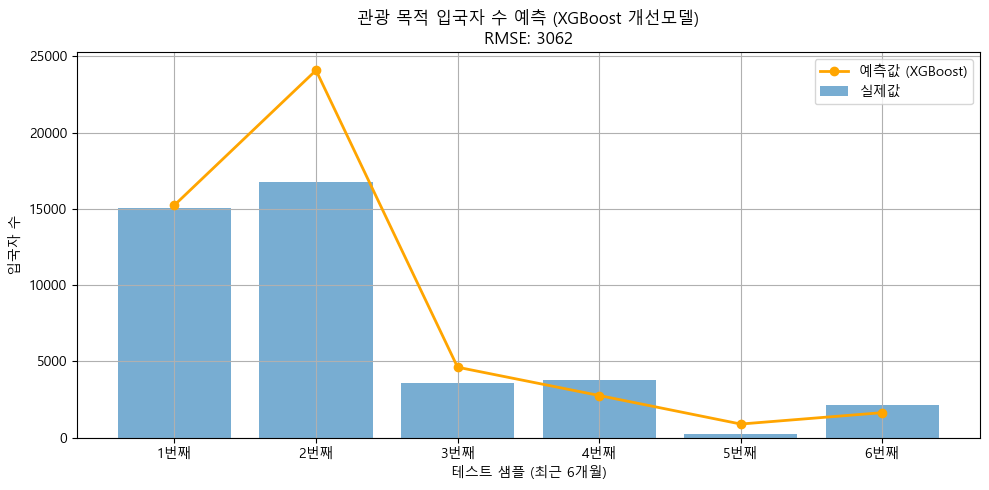

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df.sort_values("월")

# 2. 관광 목적 필터링
df = df[df["목적"] == "관광"].reset_index(drop=True)

# 3. 파생 변수 추가
df["연도"] = df["월"].dt.year
df["월_숫자"] = df["월"].dt.month
df["계절"] = df["월"].dt.month % 12 // 3  # 0~3 (겨울~가을)
df["전월입국자수"] = df["입국자수"].shift(1)
df["전년동월입국자수"] = df["입국자수"].shift(12)
df["전월증감률"] = df["입국자수"].pct_change().shift(1)
df["전년증감률"] = (df["입국자수"] - df["입국자수"].shift(12)) / df["입국자수"].shift(12)
df["이동평균"] = df["입국자수"].rolling(window=3).mean().shift(1)

# 4. 결측치 제거
df_model = df.dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()


# 5. 특성과 타겟 분리
features = ["연도", "월_숫자", "계절", "전월입국자수", "전년동월입국자수",
            "전월증감률", "전년증감률", "이동평균"]
X = df_model[features]
y = df_model["입국자수"]

# 6. 최근 6개월을 테스트셋으로 분할
X_train, X_test = X[:-6], X[-6:]
y_train, y_test = y[:-6], y[-6:]

# 7. 모델 학습
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. 예측 + 음수 방지
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, None)

# 9. 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 10. 시각화
plt.figure(figsize=(10, 5))
plt.bar(range(6), y_test.values, label="실제값", alpha=0.6)
plt.plot(range(6), y_pred, color='orange', label="예측값 (XGBoost)", marker='o', linewidth=2)
plt.title(f"관광 목적 입국자 수 예측 (XGBoost 개선모델)\nRMSE: {rmse:.0f}")
plt.xlabel("테스트 샘플 (최근 6개월)")
plt.ylabel("입국자 수")
plt.xticks(range(6), labels=[f"{i+1}번째" for i in range(6)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


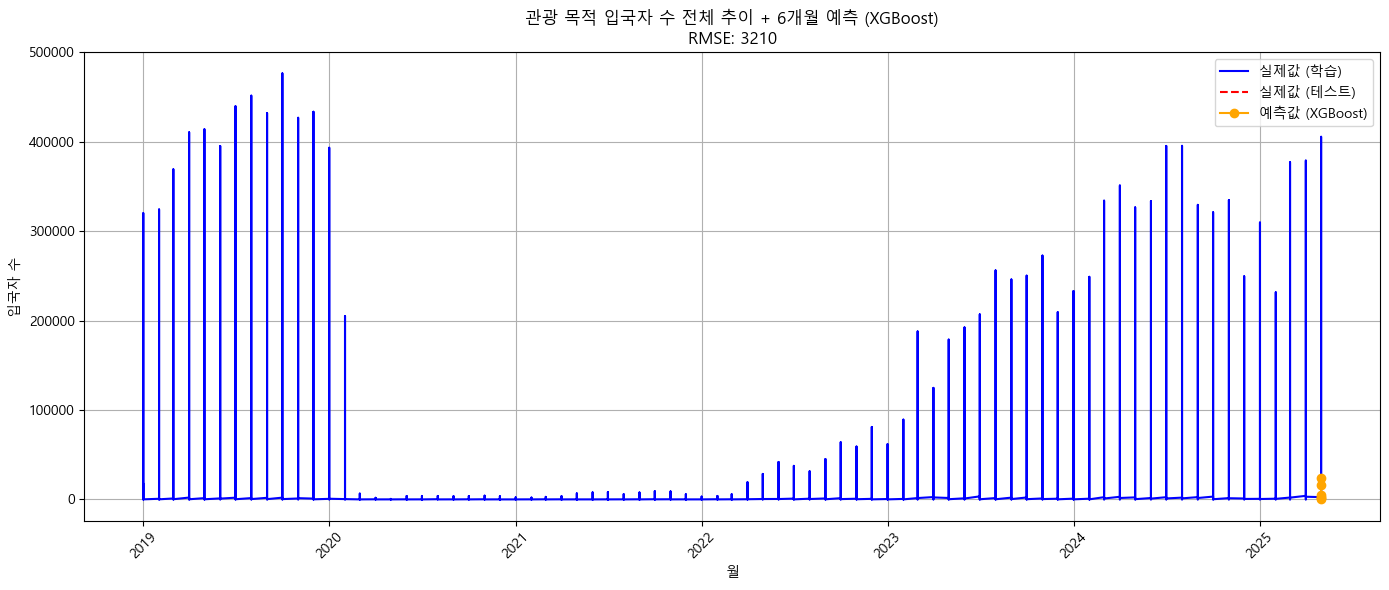

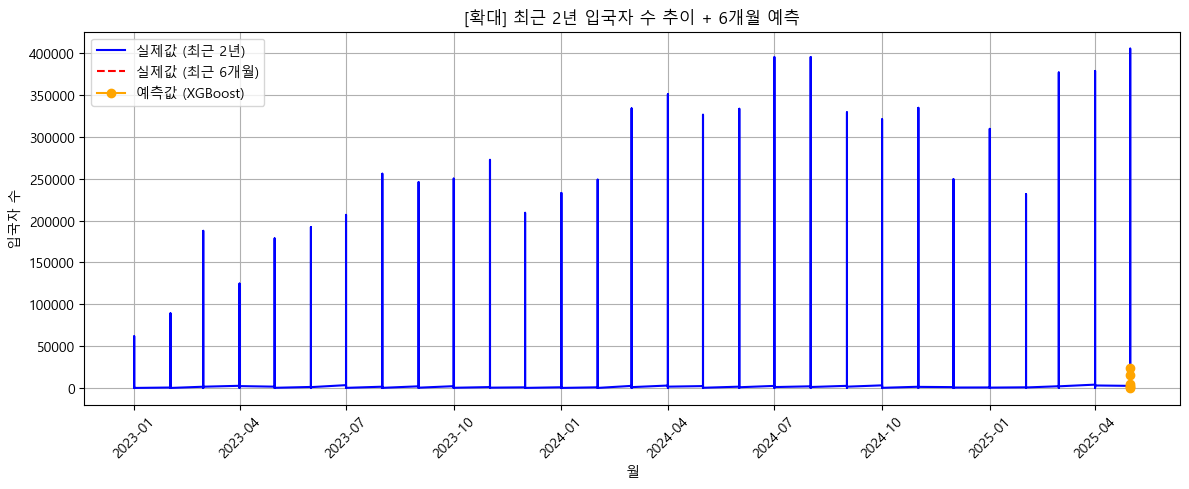

In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df.sort_values("월")

# 2. 관광 목적 필터링
df = df[df["목적"] == "관광"].reset_index(drop=True)

# 3. 파생 변수 추가
df["연도"] = df["월"].dt.year
df["월_숫자"] = df["월"].dt.month
df["계절"] = df["월"].dt.month % 12 // 3
df["전월입국자수"] = df["입국자수"].shift(1)
df["전년동월입국자수"] = df["입국자수"].shift(12)
df["전월증감률"] = df["입국자수"].pct_change().shift(1)
df["전년증감률"] = (df["입국자수"] - df["입국자수"].shift(12)) / df["입국자수"].shift(12)
df["이동평균"] = df["입국자수"].rolling(window=3).mean().shift(1)

# 4. 결측치 및 무한값 제거
df_model = df.replace([np.inf, -np.inf], np.nan).dropna().copy()

# 5. 특성 설정
features = ["연도", "월_숫자", "계절", "전월입국자수", "전년동월입국자수",
            "전월증감률", "전년증감률", "이동평균"]
df_model["월_숫자"] = df_model["월_숫자"].astype(int)
df_model["계절"] = df_model["계절"].astype(int)

X = df_model[features]
y = df_model["입국자수"]
dates = df_model["월"]

# 6. 최근 6개월 분할
X_train, X_test = X[:-6], X[-6:]
y_train, y_test = y[:-6], y[-6:]
dates_train, dates_test = dates[:-6], dates[-6:]

# 7. 모델 학습
model = XGBRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 8. 예측 및 음수 방지
y_pred = np.clip(model.predict(X_test), 0, None)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 9. 전체 시계열 + 예측 시각화
plt.figure(figsize=(14, 6))
plt.plot(dates_train, y_train, label="실제값 (학습)", color='blue')
plt.plot(dates_test, y_test, label="실제값 (테스트)", color='red', linestyle='--')
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color='orange', marker='o')
plt.title(f"관광 목적 입국자 수 전체 추이 + 6개월 예측 (XGBoost)\nRMSE: {rmse:.0f}")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. 최근 2년 확대 시각화
plt.figure(figsize=(12, 5))
mask = dates >= pd.to_datetime("2023-01-01")
plt.plot(dates[mask], y[mask], label="실제값 (최근 2년)", color='blue')
plt.plot(dates_test, y_test, label="실제값 (최근 6개월)", color='red', linestyle='--')
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color='orange', marker='o')
plt.title(f"[확대] 최근 2년 입국자 수 추이 + 6개월 예측")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


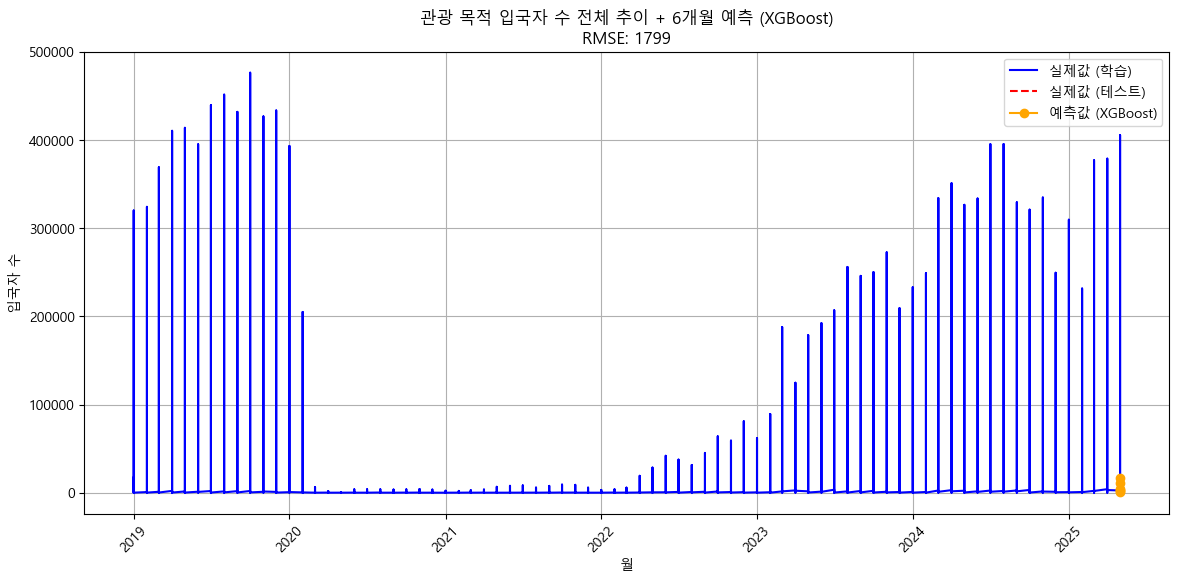

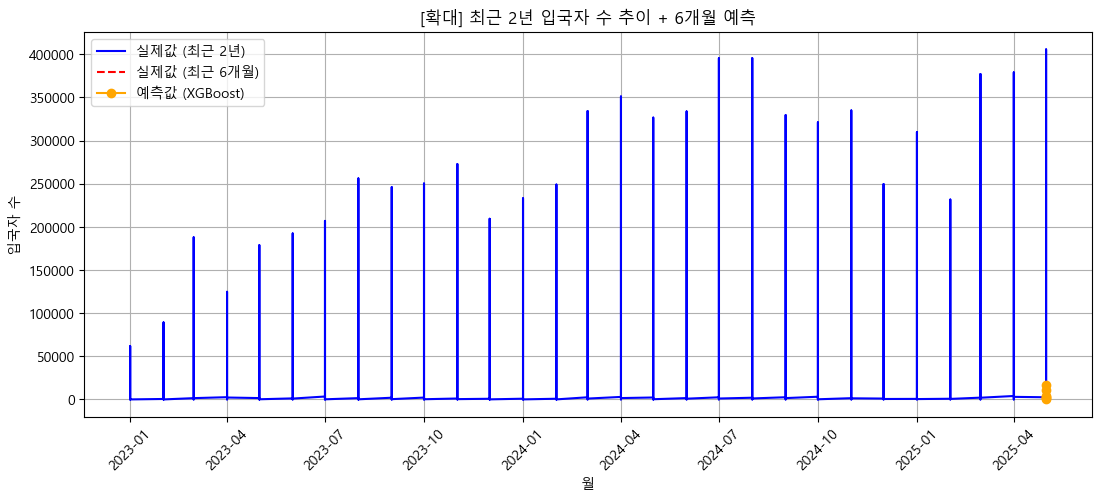

In [60]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df.sort_values("월")

# 2. 관광 목적 필터링
df = df[df["목적"] == "관광"].reset_index(drop=True)

# 3. 파생 변수 추가
df["연도"] = df["월"].dt.year
df["월_숫자"] = df["월"].dt.month
df["계절"] = df["월"].dt.month % 12 // 3
df["전월입국자수"] = df["입국자수"].shift(1)
df["전년동월입국자수"] = df["입국자수"].shift(12)
df["전월증감률"] = df["입국자수"].pct_change().shift(1)
df["전년증감률"] = (df["입국자수"] - df["입국자수"].shift(12)) / df["입국자수"].shift(12)
df["이동평균"] = df["입국자수"].rolling(window=3).mean().shift(1)

# 4. 결측치 제거
df_model = df.replace([np.inf, -np.inf], np.nan).dropna().copy()

# 5. 학습 데이터 준비
features = ["연도", "월_숫자", "계절", "전월입국자수", "전년동월입국자수",
            "전월증감률", "전년증감률", "이동평균"]
X = df_model[features]
y = df_model["입국자수"]
dates = df_model["월"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = X_scaled[:-6], X_scaled[-6:]
y_train, y_test = y[:-6], y[-6:]
dates_train, dates_test = dates[:-6], dates[-6:]

# 6. XGBoost 모델 학습
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 7. 예측
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. 전체 시계열 + 예측 시각화
plt.figure(figsize=(14, 6))
plt.plot(dates_train, y_train, label="실제값 (학습)", color='blue')
plt.plot(dates_test, y_test, label="실제값 (테스트)", color='red', linestyle='--')
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color='orange', marker='o')
plt.title(f"관광 목적 입국자 수 전체 추이 + 6개월 예측 (XGBoost)\nRMSE: {rmse:.0f}")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 9. 최근 2년 확대 시각화
plt.figure(figsize=(13, 5))
recent_mask = dates >= pd.to_datetime("2023-01-01")
plt.plot(dates[recent_mask], y[recent_mask], label="실제값 (최근 2년)", color='blue')
plt.plot(dates_test, y_test, label="실제값 (최근 6개월)", color='red', linestyle='--')
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color='orange', marker='o')
plt.title("[확대] 최근 2년 입국자 수 추이 + 6개월 예측")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


17:52:02 - cmdstanpy - INFO - Chain [1] start processing
17:52:03 - cmdstanpy - INFO - Chain [1] done processing


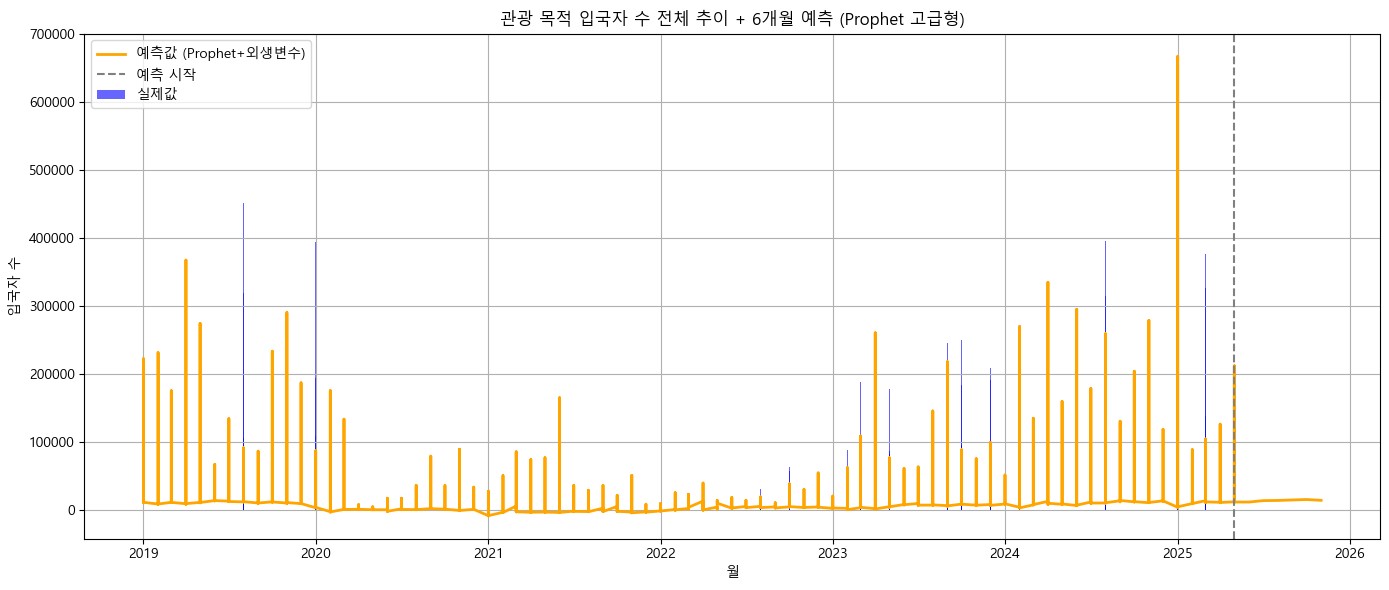

In [61]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df.sort_values("월")

# 2. 관광 목적 필터링
df = df[df["목적"] == "관광"].reset_index(drop=True)

# 3. 외생 변수 생성
df["연도"] = df["월"].dt.year
df["월_숫자"] = df["월"].dt.month
df["계절"] = df["월"].dt.month % 12 // 3
df["전월입국자수"] = df["입국자수"].shift(1)
df["전년동월입국자수"] = df["입국자수"].shift(12)
df["전월증감률"] = df["입국자수"].pct_change().shift(1)
df["전년증감률"] = (df["입국자수"] - df["입국자수"].shift(12)) / df["입국자수"].shift(12)
df["이동평균"] = df["입국자수"].rolling(window=3).mean().shift(1)
df["코로나영향"] = df["월"].apply(lambda x: 1 if pd.Timestamp("2020-01") <= x <= pd.Timestamp("2021-12") else 0)
df = df.replace([np.inf, -np.inf], np.nan).dropna().copy()

# 4. Prophet 포맷
df_prophet = df[["월", "입국자수", "전월입국자수", "전년동월입국자수", "전월증감률", "전년증감률", "이동평균", "코로나영향"]].rename(columns={"월": "ds", "입국자수": "y"})

# 5. Prophet 모델 정의 + 외생 변수 추가
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.add_regressor("전월입국자수")
model.add_regressor("전년동월입국자수")
model.add_regressor("전월증감률")
model.add_regressor("전년증감률")
model.add_regressor("이동평균")
model.add_regressor("코로나영향")

# 6. 모델 학습
model.fit(df_prophet)

# 7. 미래 예측용 데이터 구성
future = model.make_future_dataframe(periods=6, freq="MS")
future = future.merge(df_prophet.drop(columns="y"), on="ds", how="left")
for col in ["전월입국자수", "전년동월입국자수", "전월증감률", "전년증감률", "이동평균"]:
    future[col] = future[col].fillna(method='ffill')
future["코로나영향"] = future["ds"].apply(lambda x: 1 if pd.Timestamp("2020-01") <= x <= pd.Timestamp("2021-12") else 0)

# 8. 예측 수행
forecast = model.predict(future)

# 9. 시각화
plt.figure(figsize=(14, 6))
plt.bar(df_prophet["ds"], df_prophet["y"], label="실제값", color="blue", alpha=0.6)
plt.plot(forecast["ds"], forecast["yhat"], label="예측값 (Prophet+외생변수)", color="orange", linewidth=2)
plt.axvline(df_prophet["ds"].max(), color="gray", linestyle="--", label="예측 시작")
plt.title("관광 목적 입국자 수 전체 추이 + 6개월 예측 (Prophet 고급형)")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing


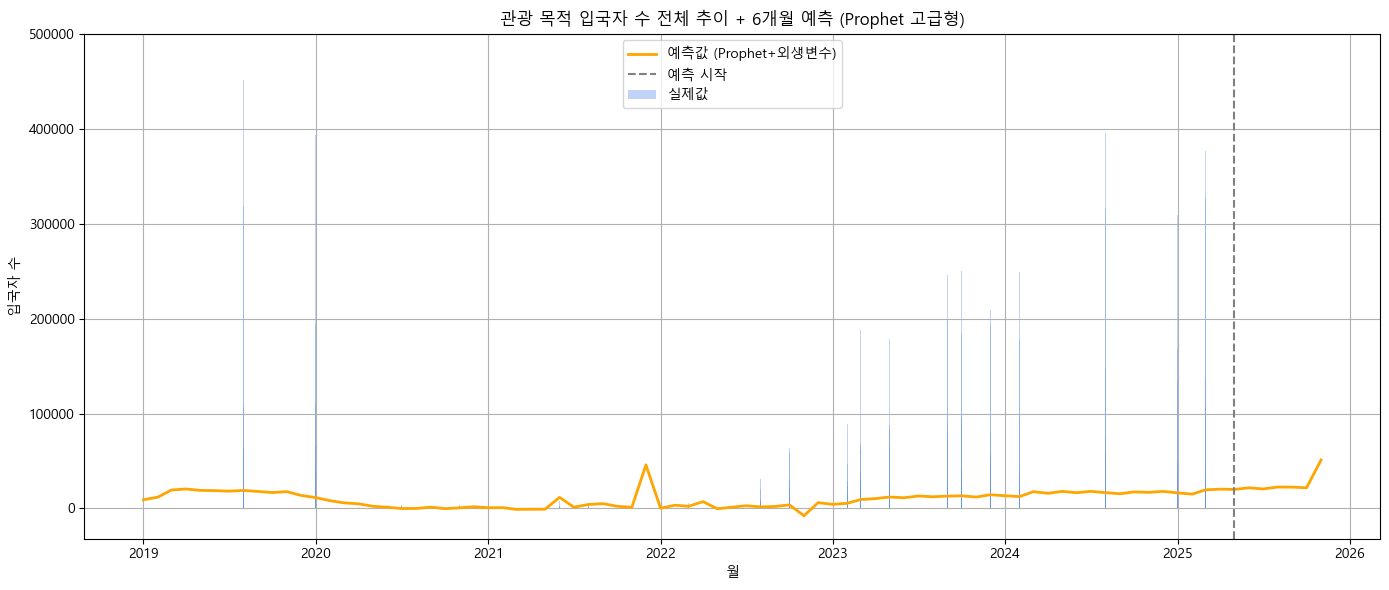

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. 데이터 불러오기
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df[df["목적"] == "관광"].sort_values("월").reset_index(drop=True)

# 2. Prophet 입력 형식 변환
df_prophet = df[["월", "입국자수"]].rename(columns={"월": "ds", "입국자수": "y"})

# 3. 외생 변수 추가 (예측력 향상용)
df_prophet["lag1"] = df_prophet["y"].shift(1)
df_prophet["lag12"] = df_prophet["y"].shift(12)
df_prophet = df_prophet.dropna().reset_index(drop=True)

# 4. Prophet 모델 정의 및 외생변수 등록
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.3
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_regressor("lag1")
model.add_regressor("lag12")

# 5. 모델 학습
model.fit(df_prophet)

# 6. 예측 데이터프레임 생성 (미래 6개월)
future = model.make_future_dataframe(periods=6, freq='MS')

# 7. 외생변수 lag 채우기
last_lag1 = df_prophet["y"].iloc[-1]
last_lag12 = df_prophet["y"].shift(12).iloc[-6:].reset_index(drop=True)

future["lag1"] = pd.concat([
    df_prophet["lag1"], 
    pd.Series([last_lag1]*6)
], ignore_index=True)

future["lag12"] = pd.concat([
    df_prophet["lag12"], 
    last_lag12
], ignore_index=True)

# 8. 예측
forecast = model.predict(future)

# 9. 시각화
plt.figure(figsize=(14, 6))
plt.bar(df_prophet["ds"], df_prophet["y"], label="실제값", alpha=0.4, color='cornflowerblue')
plt.plot(forecast["ds"], forecast["yhat"], color='orange', label="예측값 (Prophet+외생변수)", linewidth=2)
plt.axvline(x=df_prophet["ds"].iloc[-1], color='gray', linestyle='--', label="예측 시작")
plt.title("관광 목적 입국자 수 전체 추이 + 6개월 예측 (Prophet 고급형)")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


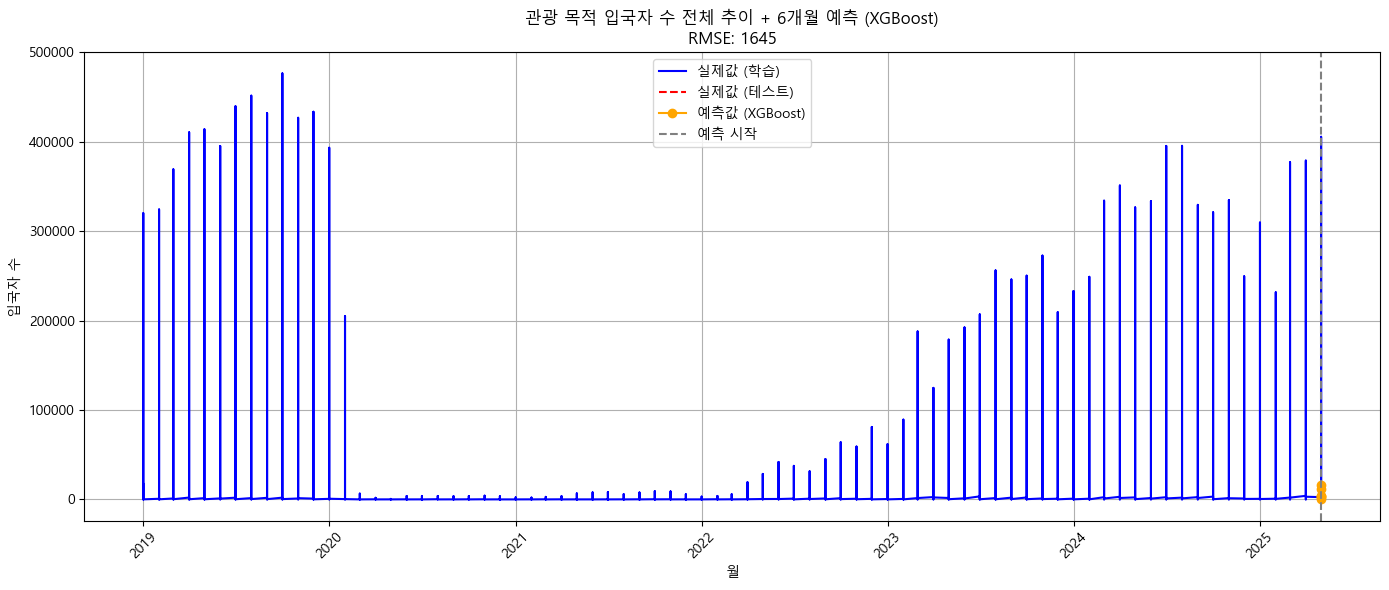

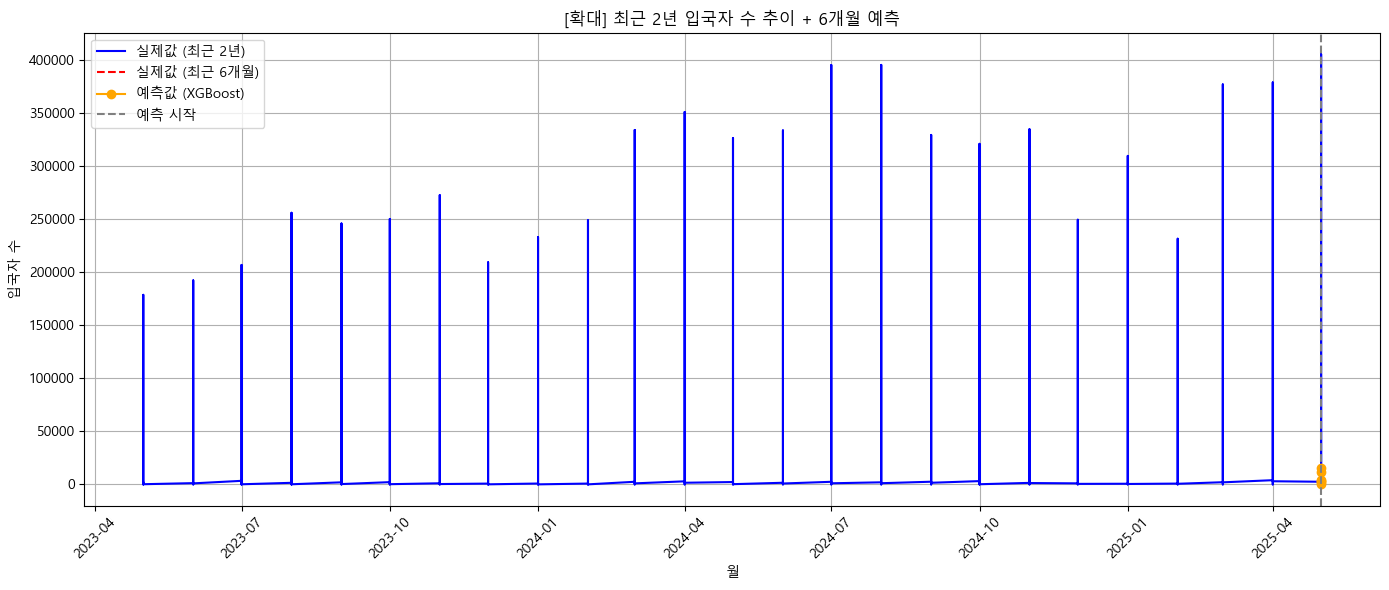

In [63]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv("./data/목적별 국적별 입국(전처리).csv", encoding="cp949")
df = df.melt(id_vars=["국적", "목적"], var_name="월", value_name="입국자수")
df["월"] = pd.to_datetime(df["월"], format="%Y년%m월")
df = df.sort_values("월")

# 2. 관광 목적 필터링
df = df[df["목적"] == "관광"].reset_index(drop=True)

# 3. 파생변수
df["연도"] = df["월"].dt.year
df["월_숫자"] = df["월"].dt.month
df["계절"] = df["월_숫자"] % 12 // 3
df["lag_1"] = df["입국자수"].shift(1)
df["lag_12"] = df["입국자수"].shift(12)
df["증감률_1"] = df["입국자수"].pct_change().shift(1)
df["증감률_12"] = (df["입국자수"] - df["입국자수"].shift(12)) / df["입국자수"].shift(12)
df["이동평균_3"] = df["입국자수"].rolling(3).mean().shift(1)

# 4. 결측 제거
df_model = df.dropna().replace([np.inf, -np.inf], np.nan).dropna().copy()

# 5. 학습용 특성
features = ["연도", "월_숫자", "계절", "lag_1", "lag_12", "증감률_1", "증감률_12", "이동평균_3"]
X = df_model[features]
y = df_model["입국자수"]
dates = df_model["월"]

# 6. 데이터 분할 (최근 6개월 테스트)
X_train, X_test = X[:-6], X[-6:]
y_train, y_test = y[:-6], y[-6:]
dates_train, dates_test = dates[:-6], dates[-6:]

# 7. XGBoost 학습
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 8. 예측
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 9. 전체 시각화
plt.figure(figsize=(14, 6))
plt.plot(dates_train, y_train, label="실제값 (학습)", color="blue")
plt.plot(dates_test, y_test, label="실제값 (테스트)", color="red", linestyle="--")
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color="orange", marker="o")
plt.axvline(dates_test.iloc[0], color="gray", linestyle="--", label="예측 시작")
plt.title(f"관광 목적 입국자 수 전체 추이 + 6개월 예측 (XGBoost)\nRMSE: {rmse:.0f}")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 10. 최근 2년 확대 시각화
plt.figure(figsize=(14, 6))
recent_mask = dates >= (dates.max() - pd.DateOffset(years=2))
plt.plot(dates[recent_mask], y[recent_mask], label="실제값 (최근 2년)", color="blue")
plt.plot(dates_test, y_test, label="실제값 (최근 6개월)", color="red", linestyle="--")
plt.plot(dates_test, y_pred, label="예측값 (XGBoost)", color="orange", marker="o")
plt.axvline(dates_test.iloc[0], color="gray", linestyle="--", label="예측 시작")
plt.title("[확대] 최근 2년 입국자 수 추이 + 6개월 예측")
plt.xlabel("월")
plt.ylabel("입국자 수")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
